In [49]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

pd.set_option("min_rows", 5)

# Read in the data

df = pd.read_csv(r'C:\Users\mthokozisi\Desktop\ZHS Analytics\Projects\Movies\movies\movies.csv')


In [50]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [51]:
# Evaluating missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [52]:
# Data types of columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [53]:
# Changing data type of column

df['budget'] = df['budget'].astype('int64', errors='ignore')

df['gross'] = df['gross'].astype('int64', errors='ignore')

df['votes'] = df['votes'].astype('int64', errors='ignore')

df['runtime'] = df['runtime'].astype('int64', errors='ignore')


In [54]:
# Expanding released column

df[['release_mnt', 'release_yr']] = df['released'].str.split(',',expand=True)


# Create correct year column 

df['yearcorrect'] = df['release_yr'].astype(str).str[:5]

In [55]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [56]:
# Drop any duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_mnt,release_yr,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,December 18,2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,April 26,2019 (United States),2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,October 1,2020 (United States),2020
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0,August 19,2020 (United States),2020


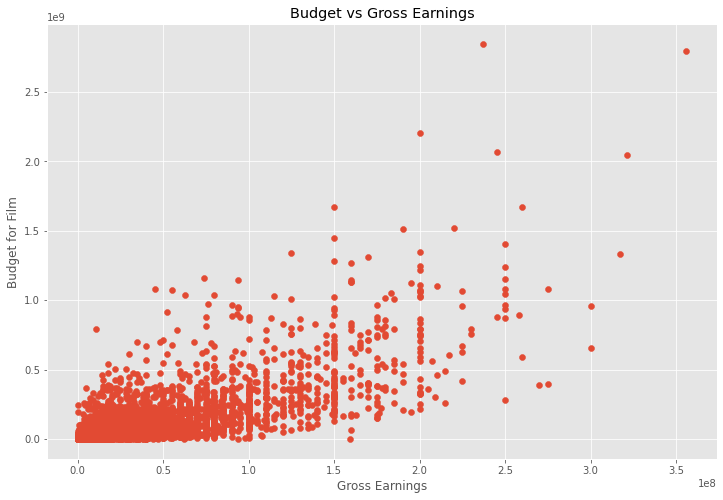

In [30]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

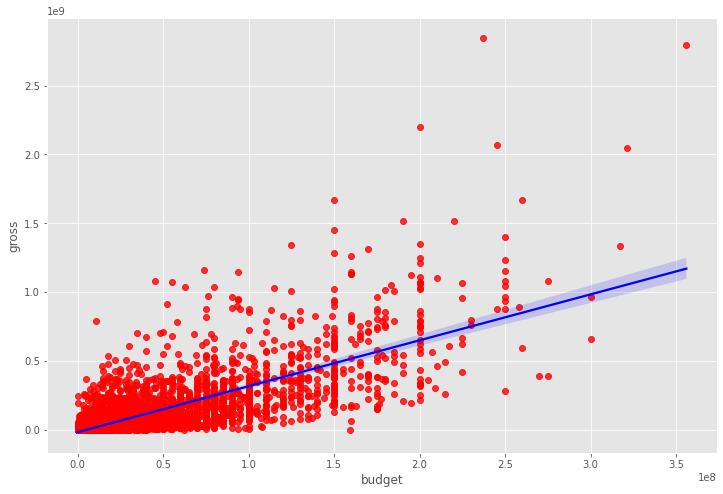

In [31]:
# plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [32]:
# Let's start looking at correlation

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


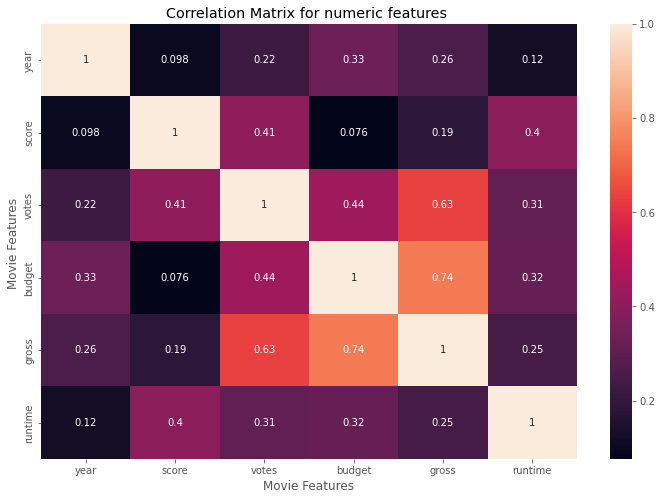

In [33]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for numeric features ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features ')
plt.show()

In [37]:
# Look at Company

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized       
        
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_mnt,release_yr,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,86,335,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,31,520,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,349,526,40
7667,5394,-1,10,2020,391,5.7,7.0,2165,3344,2463,44,NaN,NaN,1787,102.0,53,526,40


In [57]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_mnt,release_yr,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,December 18,2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,April 26,2019 (United States),2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,October 1,2020 (United States),2020
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0,August 19,2020 (United States),2020


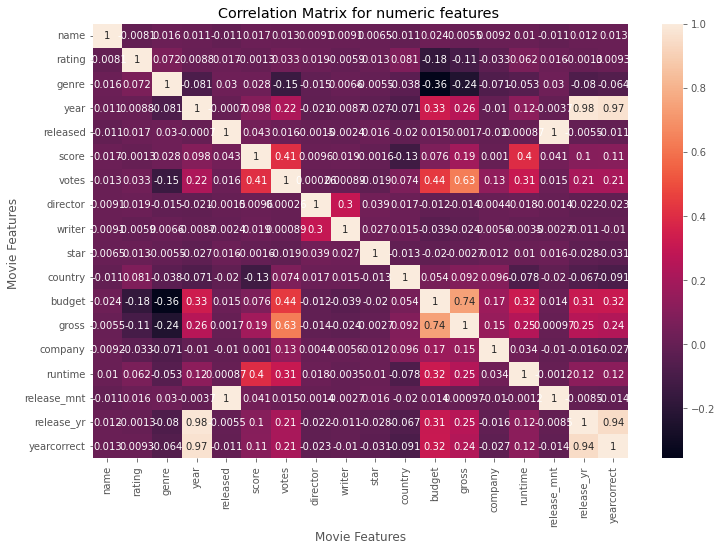

In [58]:
correlation_matrix1 = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix1, annot=True)
plt.title('Correlation Matrix for numeric features ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features ')
plt.show()

In [62]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
                              ...   
yearcorrect  release_yr     0.944167
             yearcorrect    1.000000
Length: 324, dtype: float64

In [65]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.356564
budget       genre         -0.356564
                              ...   
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
Length: 324, dtype: float64

In [66]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]

high_correlation

gross        votes          0.630757
votes        gross          0.630757
budget       gross          0.740395
gross        budget         0.740395
release_yr   yearcorrect    0.944167
yearcorrect  release_yr     0.944167
year         yearcorrect    0.967465
yearcorrect  year           0.967465
release_yr   year           0.980716
year         release_yr     0.980716
released     release_mnt    0.999759
release_mnt  released       0.999759
name         name           1.000000
release_mnt  release_mnt    1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
release_yr   release_yr     1.000000
director     director       1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
company      company        1.000000
r

In [ ]:
# Votes and Budget have the highest correlation to Gross earnings